## model training, validation


in this file we will test differment machine learning model and eventually come the end of the notebook come to a conclusion as to what model works best.

In this notebook, we will run the data on numerous classification models

- randomforest
- neural networks
- xgboost


We will firstly train the models without tuning any hyperparameters and eximamine the output byt looking at the precision score, confusion maxtrix and  ROC/AUC curve to examine the models relative performance.

For consistency/reproducibility I will set the random state to be 42.

### Basic intution behind each classification model

- **Random Forest** - based on an ensemble of decision trees, where each decision tree is trained on a random subset of the training data and a random subset of the input features. The output of the random forest model is the majority vote of the decision trees.


- **neural networks** -  composed of interconnected layers of artificial neurons. Each neuron takes input, applies a transformation, and passes it to the next layer. Through a process called training, the network adjusts the strengths of connections (weights) between neurons to learn patterns in the input data. This enables the network to make predictions or classify new inputs.



- **xgboost** - extreme gradient boosting combines the concepts of gradient boosting and decision trees to create an ensemble of weak learners that iteratively improve predictions. XGBoost builds trees sequentially, optimizing a loss function by adding trees that minimize the errors of previous iterations. It incorporates regularization techniques to control model complexity and prevent overfitting.




In [2]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

from sklearn import metrics


from utils_fn import ClassificationAnalysis

In [3]:

# loading the data and splitting data
df = pd.read_csv('resampled-diabetes.csv')
X = df.loc[:, 'pregnancies':'age']
y = df.loc[:, 'outcome']

# splitting data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# importing modules that could solve this classification algorithm the best.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
basic_classification_models = {
    'Logistic Regression': LogisticRegression(random_state=22),
    'RandomForestClassifier': RandomForestClassifier(random_state=22),
    'Neural Network':   MLPClassifier(random_state=22)
}

basic_classification_analysis = {model_name:  ClassificationAnalysis(X_test, y_test, model.fit(X_train, y_train), 
                                                                     model_name)
                                 
                                 for model_name, model in basic_classification_models.items()}
basic_classification_analysis

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': <__main__.ClassificationAnalysis at 0x2c9efd16c10>,
 'RandomForestClassifier': <__main__.ClassificationAnalysis at 0x2c9f547ddf0>,
 'Neural Network': <__main__.ClassificationAnalysis at 0x2c9f547de20>}

### Training/predicting RandomForestModels without tuning hyperpatameters

In [10]:
tuned_model = RandomForestClassifier(random_state=22)

In [11]:
#identifying which features the model thinks is important
[{x:y} for x,y in zip(tuned_model.fit(X_train, y_train).feature_names_in_,
                      tuned_model.fit(X_train, y_train).feature_importances_)]

[{'pregnancies': 0.07520143746925241},
 {'glucose': 0.20911325070017192},
 {'bloodpressure': 0.07942867134993471},
 {'skinthickness': 0.09356451152709651},
 {'insulin': 0.10799586129982293},
 {'bmi': 0.1581329532318809},
 {'diabetespedigreefunction': 0.15000157351344157},
 {'age': 0.12656174090839903}]

as model has established that glucose levels is one of the most important features  when it comes to identifying whether an individual has diabetes. this matches with what we expect since a high glucose level indicates the presence of diabetes.


In [28]:
# inspecting randomly samples decision trees in the forest model
import matplotlib.pyplot as plt
from sklearn import tree
import random

def visualise_decision_trees(model):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,50), dpi=300)
    tree.plot_tree(model)
    return plt.show()



for trees in random.sample(train.estimators_, 2):
    print('decision tree for model', trees)
    visualise_decision_trees(trees)


decision tree for model DecisionTreeClassifier(max_features='sqrt', random_state=67746612)


decision tree for model DecisionTreeClassifier(max_features='sqrt', random_state=1711326260)


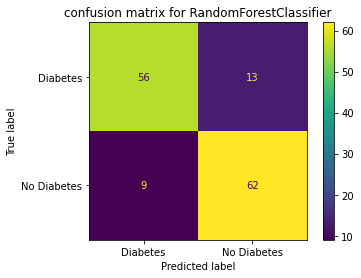

In [10]:
simple_random_forest = basic_classification_analysis['RandomForestClassifier']
simple_random_forest.visualise_confusion_matrix()

In [11]:
simple_random_forest.metrics()

              precision    recall  f1-score   support

           0       0.86      0.81      0.84        69
           1       0.83      0.87      0.85        71

    accuracy                           0.84       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.84      0.84      0.84       140



'precision score 0.8266666666666667  recall score 0.8732394366197183'

area under curve for RandomForestClassifier is 0.8424168197591345


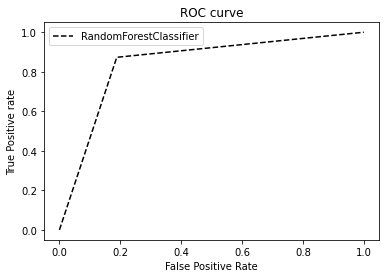

In [13]:
simple_random_forest.reciever_operator_curve()

## Training/predicting MLPClassifier without tuning  hyperparameters

In [17]:
# setting verbose=True so that we ca
clf = MLPClassifier(random_state=22, verbose=True).fit(X_train, y_train)
clf

Iteration 1, loss = 5.74244858
Iteration 2, loss = 2.85075710
Iteration 3, loss = 2.79518461
Iteration 4, loss = 2.23014846
Iteration 5, loss = 1.33238199
Iteration 6, loss = 1.65700554
Iteration 7, loss = 1.58043256
Iteration 8, loss = 1.28652564
Iteration 9, loss = 1.30554561
Iteration 10, loss = 1.14444056
Iteration 11, loss = 1.02197069
Iteration 12, loss = 1.04030114
Iteration 13, loss = 0.97146936
Iteration 14, loss = 0.95768101
Iteration 15, loss = 0.87447834
Iteration 16, loss = 0.84652017
Iteration 17, loss = 0.82494264
Iteration 18, loss = 0.79677878
Iteration 19, loss = 0.76996020
Iteration 20, loss = 0.76129823
Iteration 21, loss = 0.74825012
Iteration 22, loss = 0.73742843
Iteration 23, loss = 0.72378759
Iteration 24, loss = 0.70875951
Iteration 25, loss = 0.70101966
Iteration 26, loss = 0.69309031
Iteration 27, loss = 0.69156707
Iteration 28, loss = 0.67834507
Iteration 29, loss = 0.67567636
Iteration 30, loss = 0.67099217
Iteration 31, loss = 0.66027623
Iteration 32, los

MLPClassifier(random_state=22, verbose=True)

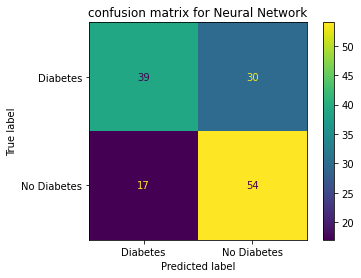

In [9]:
neural_network = basic_classification_analysis['Neural Network']
neural_network.visualise_confusion_matrix()

In [11]:
neural_network.metrics()

              precision    recall  f1-score   support

           0       0.70      0.57      0.62        69
           1       0.64      0.76      0.70        71

    accuracy                           0.66       140
   macro avg       0.67      0.66      0.66       140
weighted avg       0.67      0.66      0.66       140



'precision score 0.6428571428571429  recall score 0.7605633802816901'

area under curve for Neural Network is 0.662890385793019


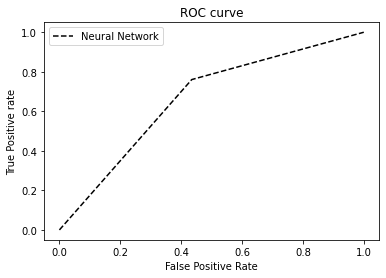

In [10]:
neural_network.reciever_operator_curve()

## Training/predicting Logistic Regression without tuning  hyperparameters

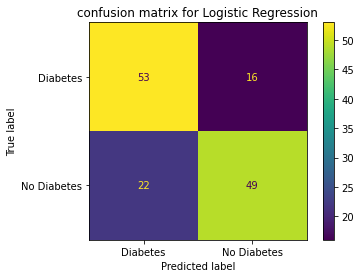

In [7]:
simple_logit_model = basic_classification_analysis['Logistic Regression']
simple_logit_model.visualise_confusion_matrix()

In [8]:
simple_logit_model.metrics()

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        69
           1       0.75      0.69      0.72        71

    accuracy                           0.73       140
   macro avg       0.73      0.73      0.73       140
weighted avg       0.73      0.73      0.73       140



'precision score 0.7538461538461538  recall score 0.6901408450704225'

area under curve for Logistic Regression is 0.7291283935497039


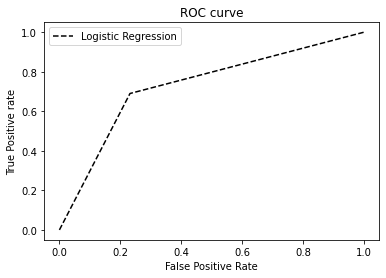

In [9]:
simple_logit_model.reciever_operator_curve()

## Training/predicting Xgboost without hyperparameters

In [1]:
pip install --user xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
import xgboost
xgboost_clf = xgboost.XGBClassifier()

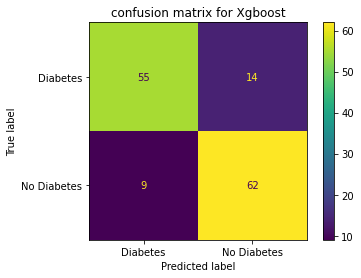

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        69
           1       0.82      0.87      0.84        71

    accuracy                           0.84       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.84      0.84      0.84       140

area under curve for Xgboost is 0.8351704429475402


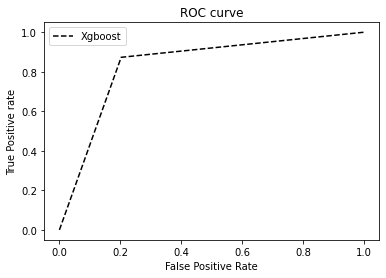

In [11]:
xgboost_analysis = ClassificationAnalysis(X_test, y_test, xgboost_clf.fit(X_train, y_train), 'Xgboost')
xgboost_analysis.visualise_confusion_matrix()
xgboost_analysis.metrics()
xgboost_analysis.reciever_operator_curve()


In [12]:
xgboost_analysis.incorrect_model_probabilities()

pregnancies  glucose  bloodpressure  skinthickness  insulin        bmi  \
11             5      136             84             41       88  35.000000   
38             0      165             76             43      255  47.900000   
40             2      128             64             42        0  40.000000   
57             7      179             95             31        0  34.200000   
59             6      111             64             39        0  34.200000   
61             1      193             50             16      375  25.900000   
69             1      147             72             38      247  36.428548   
75             5        0             80             32        0  41.000000   
80             2       90             58             25       89  32.057922   
81             3      163             70             18      105  31.600000   
83             8      105            100             36        0  43.300000   
99             3       61             82             28        0  34.400000   
107            8      126             88             36      108  38.500000   
115            6      154             78             41      140  46.100000   
118            6      115             60             39        0  33.700000   
119            2      129             74             26      205  33.200000   
122            2      106             64             35      119  30.500000   
124            8       65             72             23        0  32.000000   
126            2      110             74             29      125  32.400000   
128            4      189            110             31        0  28.500000   
131            5      109             75             26        0  36.000000   
135            0      135             68             42      250  42.300000   
137            5      105             68             31        0  36.891633   

     diabetespedigreefunction  age  actual_outcome  predicted_outcome  \
11                   0.286000   35               1                  0   
38                   0.259000   26               0                  1   
40                   1.101000   24               0                  1   
57                   0.164000   60               0                  1   
59                   0.260000   24               0                  1   
61                   0.655000   24               0                  1   
69                   0.631685   26               1                  0   
75                   0.346000   37               1                  0   
80                   0.592660   27               1                  0   
81                   0.268000   28               1                  0   
83                   0.239000   45               1                  0   
99                   0.243000   46               0                  1   
107                  0.349000   49               0                  1   
115                  0.571000   27               0                  1   
118                  0.245000   40               1                  0   
119                  0.591000   25               0                  1   
122                  1.400000   34               0                  1   
124                  0.600000   42               0                  1   
126                  0.698000   27               0                  1   
128                  0.680000   37               0                  1   
131                  0.546000   60               0                  1   
135                  0.365000   24               1                  0   
137                  0.300716   29               1                  0   

               prediction_prob  
11   [0.94420296, 0.055797033]  
38     [0.12257129, 0.8774287]  
40    [0.01716727, 0.98283273]  
57    [0.029919624, 0.9700804]  
59     [0.23665339, 0.7633466]  
61     [0.06543112, 0.9345689]  
69     [0.5100398, 0.48996016]  
75    [0.83467823, 0.16532177]  
80    [0.9156595, 0.084340505]  
81     [0.8668569, 0.1331

In [8]:
import pandas as pd
import plotly.express as px
import numpy as np
accuracy_performance = pd.DataFrame({
    'xgboost': [0.84, np.NaN],
    'random_forest': [0.84, 0.86],
    'neural_networks': [0.66, 0.71],
    'model':['baseline', 'hyperparamer-tuned']
}, index=['baseline', 'hyperparamer-tuned'])
# fig = px.bar(accuracy_performance, ) 

accuracy_performance

xgboost  random_forest  neural_networks  \
baseline               0.84           0.84             0.66   
hyperparamer-tuned      NaN           0.86             0.71   

                                 model  
baseline                      baseline  
hyperparamer-tuned  hyperparamer-tuned

In [15]:
fig = px.bar(accuracy_performance,x=['xgboost', 'random_forest', 'neural_networks'], y='model',
             barmode='group', 
             labels={
                     'variable': 'classificaiton models',
                     'value': 'accuracy'
                 },
             title='accuracy performance of the each model')
fig.write_html('accuracy_comparision.html')
fig.show()